<h1>Data Preprocessing</h1>

<StemContainer object of 3 artists>

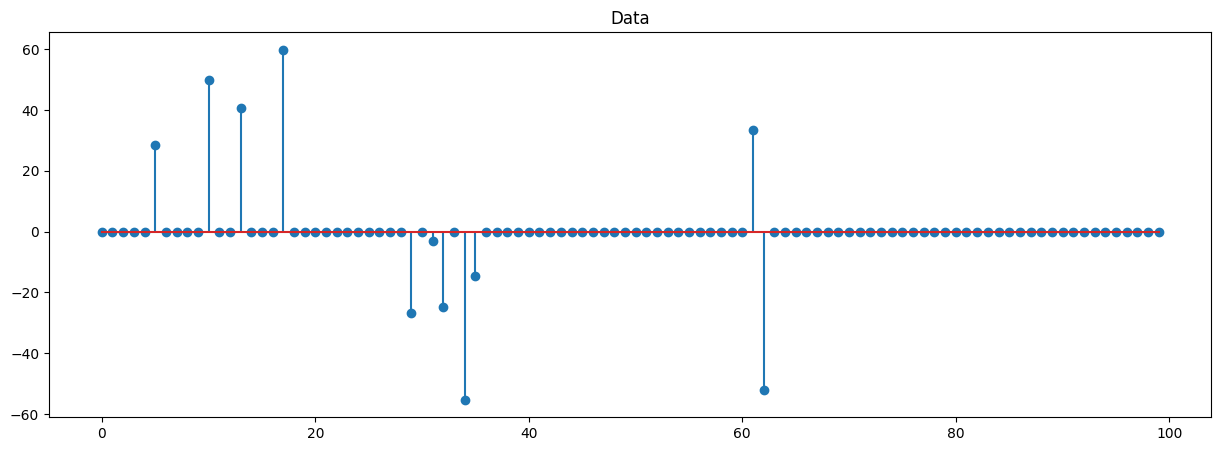

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Data Generation
def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no= 200094 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30

# Plotting the Signal
signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


In [2]:
# MaxAbsScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaled_data_max_abs = scaler.fit_transform(signal)

In [3]:
# MinMaxScaler
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data


scaled_data_min_max = min_max_scale(signal)

min of data -55.29943158344419 max of data 59.85891236288117


In [4]:
# StandardScaler
def standard_scale(data):
    mean = np.mean(data)
    std = np.std(data)
    print("mean of data", mean, "std of data", std)
    scaled_data = (data - mean) / std
    return scaled_data

scaled_data_standard = standard_scale(signal)

mean of data 0.35788433724988084 std of data 13.031460278540992


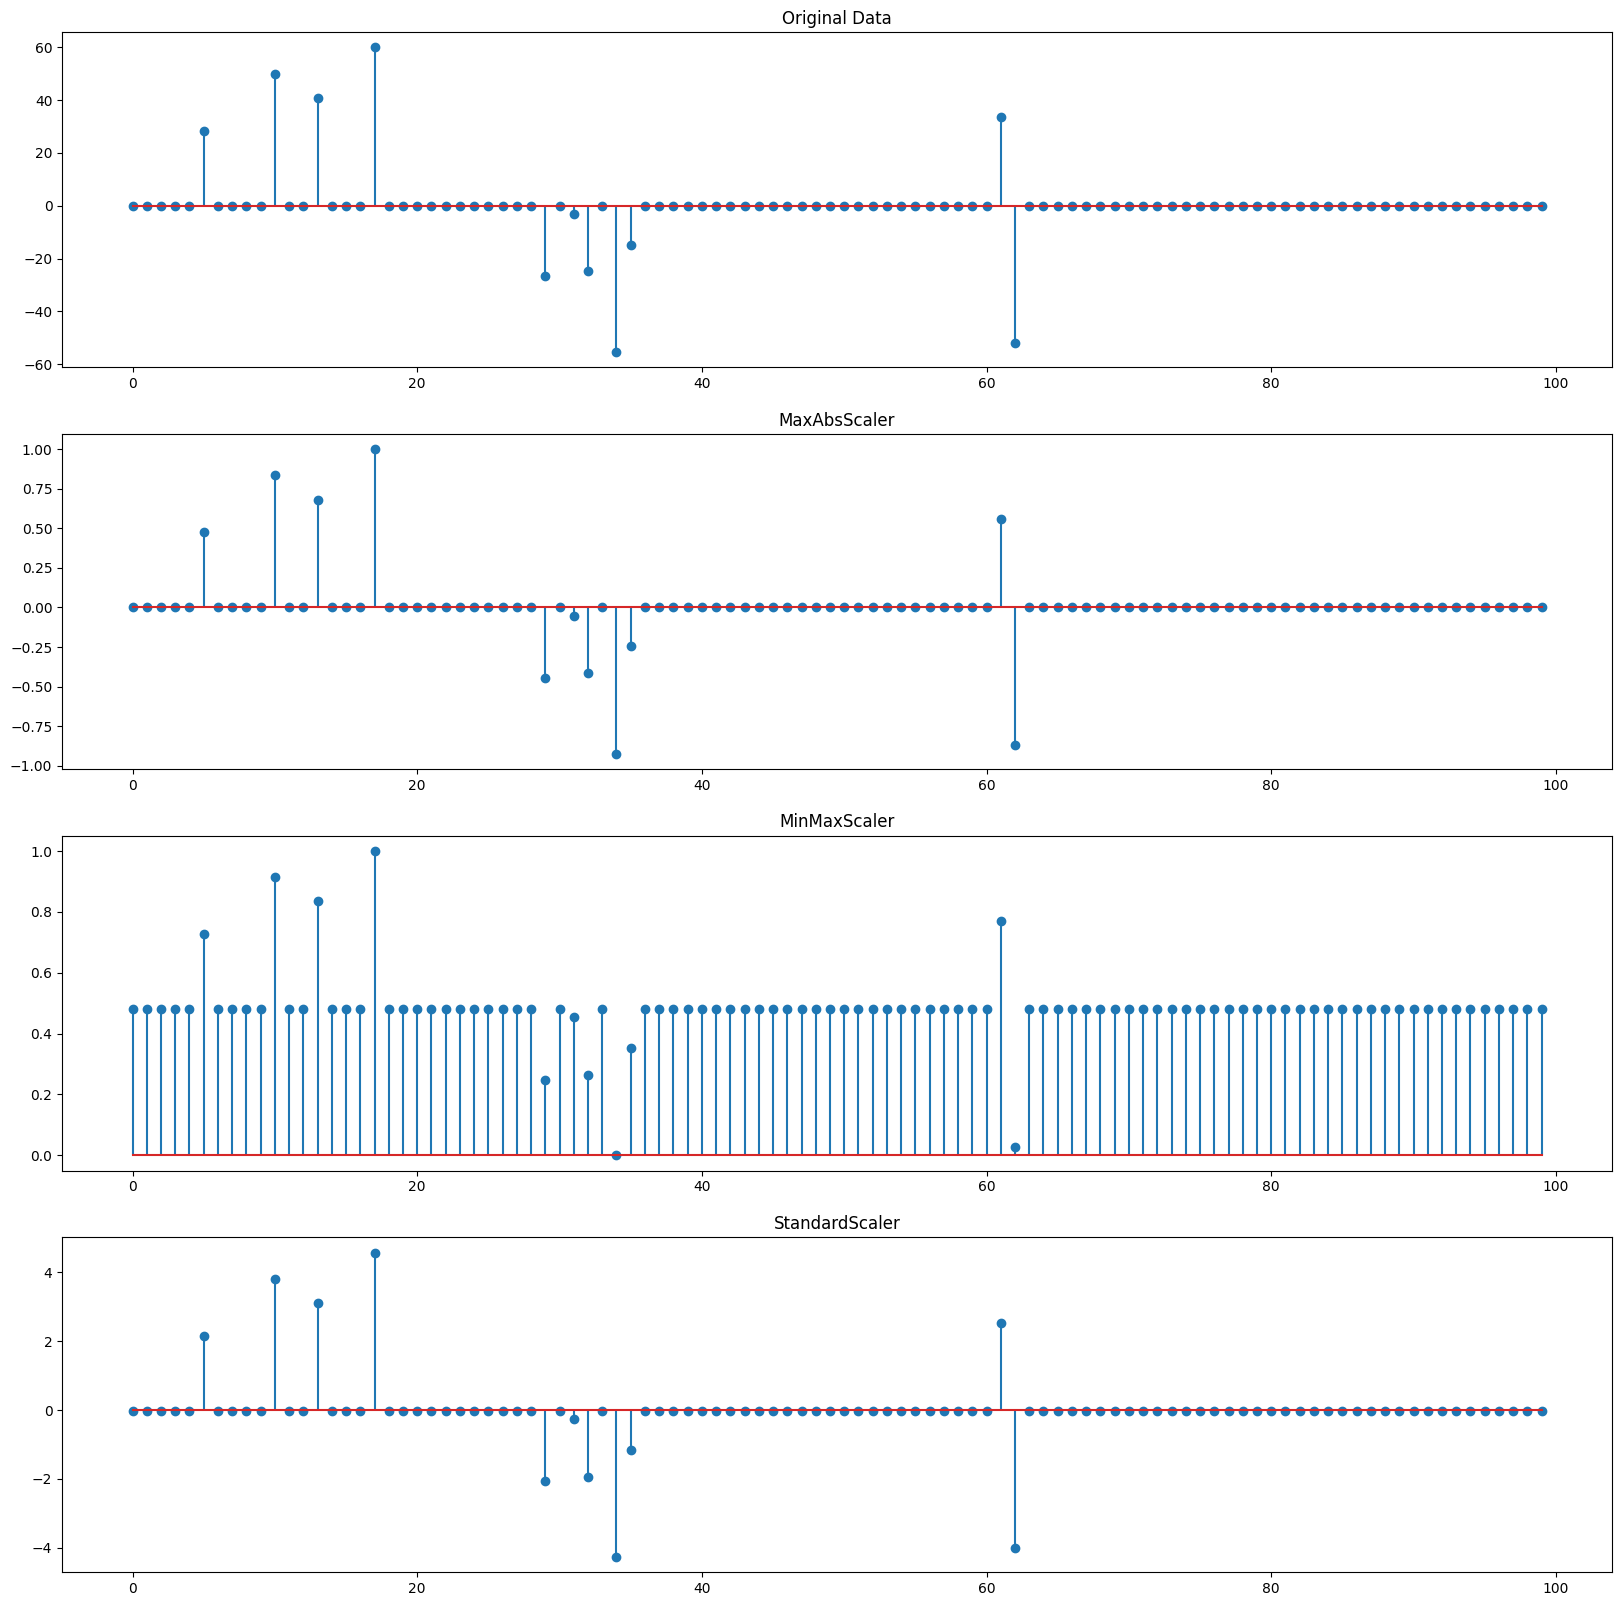

In [5]:
# Visualizing the Data before and after Scaling
fig, ax = plt.subplots(4, 1, figsize=(20, 20))
ax[0].stem(signal)
ax[0].set_title("Original Data")
ax[1].stem(scaled_data_max_abs)
ax[1].set_title("MaxAbsScaler")
ax[2].stem(scaled_data_min_max)
ax[2].set_title("MinMaxScaler")
ax[3].stem(scaled_data_standard)
ax[3].set_title("StandardScaler")
plt.show()

<h1>Linear Regression on Real World Data</h1>

In [6]:
import numpy as np
import pandas as pd
# Loading data from CSV
file_path = r'E:\Pattern Recognition\EN3150-Pattern-Recognition\Assignment 1\Supporting Materials\Advertising.csv '
df = pd. read_csv ( file_path )
print (df. head ())

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


In [24]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
# Independent variables
X = df[['TV', 'radio', 'newspaper']]
# Dependent variable
y = df['sales']
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [25]:
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
# Creating a Linear Regression object
model = LinearRegression()
# Training the model
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Evaluating the Model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import statsmodels.api as sm

# Making predictions on the test set
y_pred = model.predict(X_test)
# Calculating the residuals
residuals = y_test - y_pred
## Calculating sum of squares (RSS) ##
rss = np.sum(np.square(residuals))
# Total number of samples in the test set
N = len(y_test)
# Number of features
d = X_test.shape[1]
## Residual Standard Error (RSE) ##
rse = np.sqrt(rss / (N - d))
## Mean Squared Error (MSE) ##
mse = mean_squared_error(y_test, y_pred)
## R2 statistic ##
r2 = r2_score(y_test, y_pred)
# OLS model
ols_model = sm.OLS(y_train, X_train).fit()
## Standard Errors for each feature ##
se_b = ols_model.bse
## t-statistic for each feature ##
t_stat = ols_model.tvalues
## p-value for each feature ##
p_values = ols_model.pvalues


# Printing the results
print("Residual Sum of Squares (RSS): {:.2f}".format(rss))
print("Residual Standard Error (RSE): {:.2f}".format(rse))
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R2 statistic: {:.2f}".format(r2))
print("Standard Errors for each feature: {}".format(se_b))
print("t-statistic for each feature: {}".format(t_stat))
print("p-value for each feature: {}".format(p_values))

Residual Sum of Squares (RSS): 88.12
Residual Standard Error (RSE): 1.54
Mean Squared Error (MSE): 2.20
R2 statistic: 0.93
Standard Errors for each feature: TV           0.001445
radio        0.010720
newspaper    0.007592
dtype: float64
t-statistic for each feature: TV           37.319943
radio        20.537269
newspaper     1.990823
dtype: float64
p-value for each feature: TV           5.863407e-80
radio        2.465181e-46
newspaper    4.823571e-02
dtype: float64


<h1>Linear Regression impact on Outliers</h1>

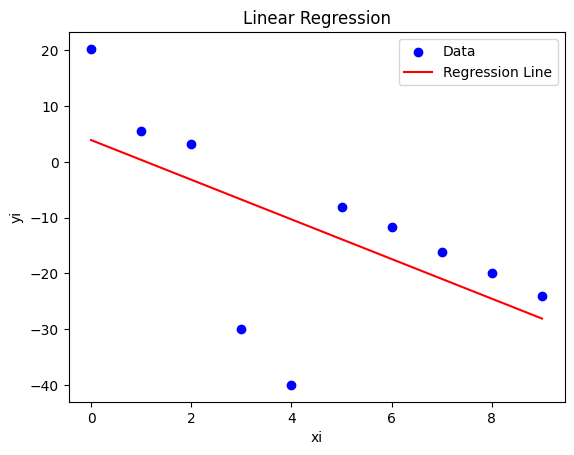

In [27]:
# Data
xi = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
yi = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])
# Calculating the Coefficients of the Linear Regression Model
slope, intercept = np.polyfit(xi, yi, 1)
# Creating the Linear Regression Model
regression_line = slope * xi + intercept
# Scatter Plot of the Data
plt.scatter(xi, yi, label='Data', color='blue')
# Plotting the Regression Line
plt.plot(xi, regression_line, label='Regression Line', color='red')
plt.xlabel('xi')
plt.ylabel('yi')
plt.legend()
plt.title('Linear Regression')
plt.show()